  # A Credit Scoring Model

Jean Githae

## Problem Statement

Financial markets perform the essential economic function of channeling funds from households surplus funds by spending less
than their income to those that have a shortage of funds because they wish to spend more than their income. The often unsung heroes of these markets are financial intermediaries, who facilitate this movement of funds.

A financial intermediary borrows funds from the savers and uses these funds to make loans to borrowers.The borrower repays the loan with interest attached. The interest serves as an income generator for both the intermediary and saver.Sometimes, the borrower may fail to pay back the loan, meaning that both the loan and interest are lost. To mitigate this loss, financial intermediaries enact measures to ensure that only borrowers with a low likelihood of default are issued with funds. 

Selection criteria are generally based on the following:
- borrower's repayment capacity 
- strength of the loan guarantee
- experience with the intermediary
- credit score 
- intended use of funds 

As a starting point, the intermediary rates the prospective customer based on their externally generated credit reference score, usually from a credit reference bureau. In a competitive lending environment, they will have an advantage if they are able to select borrowers based on a better score, based on internal metrics. This score needs to be robust enough to allow a wide range of clients, who, most importantly, shall repay their loan.

The objective of this project is to predict the percentage of customers who are loan defaulters. Additionally, an improved credit score shall be built, with the aim of increasing the firm's revenue by reducing the number of selected defaulters. 

## Dataset Description

In [1]:
#Import packages
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import xgboost as xg
import seaborn as sns; sns.set
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from scipy import stats

In [191]:
df = pd.read_csv("C:\\Users\\Jeanie\\Desktop\\loans.csv", parse_dates=['DisbursementDate'])
df.head()

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default
0,380415,2017-10-13,27.0,1.0,3.0,53.0,0.0,0.0,25.85,7308.66,8885.0,547.0,1000.0,0
1,153249,2017-09-06,54.0,1.0,3.0,142.0,0.0,0.0,12.05,6268.00,3807.0,506.0,2050.0,0
2,82776,2017-09-25,44.0,2.0,5.0,70.0,0.0,0.0,369.04,15475.66,13883.0,554.0,500.0,0
3,190996,2017-06-23,30.0,1.0,5.0,93.0,0.0,0.0,403.01,13294.33,13481.0,569.0,200.0,0
4,375566,2017-08-23,36.0,1.0,5.0,116.0,0.0,39678.0,2143.38,20054.76,19227.4,633.0,7000.0,0


In [3]:
df.describe()

,Customer_WID,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default
count,500000.000000,499989.000000,499989.000000,499989.000000,499989.000000,499989.000000,4.999890e+05,4.999890e+05,4.999890e+05,4.999890e+05,499989.000000,500000.000000,500000.000000
mean,208928.520236,37.999568,1.279290,4.781061,89.711334,0.000004,1.535980e+04,1.190511e+04,1.009236e+05,1.018893e+05,586.127537,9155.098668,0.023830
std,120648.505833,10.986557,0.448664,0.910897,33.675991,0.002828,3.584068e+04,5.380335e+04,7.665491e+05,7.765588e+05,109.543161,16812.813799,0.152519
min,2.000000,3.000000,0.000000,0.000000,4.000000,0.000000,0.000000e+00,-4.523452e+06,0.000000e+00,0.000000e+00,0.000000,100.000000,0.000000
25%,104443.750000,30.000000,1.000000,4.000000,65.000000,0.000000,0.000000e+00,7.661200e+02,1.186523e+04,1.109770e+04,547.000000,2000.000000,0.000000
50%,209088.500000,36.000000,1.000000,5.000000,96.000000,0.000000,0.000000e+00,2.819820e+03,1.939200e+04,1.861900e+04,603.000000,4900.000000,0.000000
75%,313030.250000,44.000000,2.000000,5.000000,116.000000,0.000000,2.076600e+04,7.417820e+03,3.872886e+04,3.740300e+04,653.000000,9900.000000,0.000000
max,418241.000000,118.000000,3.000000,8.000000,144.000000,2.000000,2.186055e+06,5.705195e+06,9.747924e+07,9.467495e+07,747.000000,200000.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 14 columns):
Customer_WID         500000 non-null int64
DisbursementDate     500000 non-null datetime64[ns]
Age                  499989 non-null float64
CustomerType         499989 non-null float64
SOR                  499989 non-null float64
MonthsSinceOpen      499989 non-null float64
MonthsSinceActive    499989 non-null float64
FinancialMeasure1    499989 non-null float64
FinancialMeasure2    499989 non-null float64
FinancialMeasure3    499989 non-null float64
FinancialMeasure4    499989 non-null float64
CRBScore             499989 non-null float64
Amount               500000 non-null float64
Default              500000 non-null int64
dtypes: datetime64[ns](1), float64(11), int64(2)
memory usage: 53.4 MB


The data consists of 14 variables with 500,000 observations of varying ranges. The data has 11 float variables, 2 integral values and one text value. There are missing values. The variable description is listed below:

|Column | Data Type | Description |
|- |- |- |   
| Customer_WID | Integer | Unique customer identifier   
| DisbursementDate | Date | Date, when loan was disbursed  
| Age | Integer | Customer age  
| CustomerType | Factor | Internal customer type classification (1,2)  
| SOR | Integer | A metric of customer relationship with the bank    
| MonthsSinceOpen | Integer | Number of months since first account for the customer  
| MonthsSinceActive | Integer | Number of months since last activity  
| FinancialMeasure1 | Float | Some measure of financial activity of a customer  
| FinancialMeasure2 | Float | Some measure of financial activity of a customer  
| FinancialMeasure3 | Float | Some measure of financial activity of a customer 
| FinancialMeasure4 | Float | Some measure of financial activity of a customer  
| CRBScore | Integer | Credit rating bureau score  
| Amount | Float | Loan amount  
| Default | Boolean | 1 - Defaulted on this loan, 0 - paid

 



## Dataset exploration

### Missing values

First, the missing data, although minimal, needs to be analyzed.

In [5]:
#Check if there is any pattern for the missing values
df[df.isnull().any(axis=1)]

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default
6621,141434,2017-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200000.0,0
9414,9218,2017-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70000.0,0
27763,9218,2017-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70000.0,0
60649,80457,2017-06-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750.0,0
217026,80339,2017-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,0
239942,85833,2017-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,0
270296,185640,2017-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8300.0,0
342033,252588,2017-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0,0
342515,317353,2017-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67000.0,0
477643,61287,2017-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120000.0,0


The missing values are absent for 10 out of 14 observations. This data seems to missing at random, as they belong to loans taken by different individuals on different dates. To avoid misinterpretations from wrongly imputed values, it is safer to drop these missing values

In [6]:
#Drop rows with missing data
df.dropna(inplace=True)

In [7]:
#Confirm that there are no missing values
df.isnull().any()

Customer_WID         False
DisbursementDate     False
Age                  False
CustomerType         False
SOR                  False
MonthsSinceOpen      False
MonthsSinceActive    False
FinancialMeasure1    False
FinancialMeasure2    False
FinancialMeasure3    False
FinancialMeasure4    False
CRBScore             False
Amount               False
Default              False
dtype: bool

## General overview of the data

A general overview of the data can be obtained from a pandas profiling report

In [8]:
pandas_profiling.ProfileReport(df)

Number of variables,15
Number of observations,499989
Total Missing (%),0.0%
Total size in memory,57.2 MiB
Average record size in memory,120.0 B
Numeric,11
Categorical,0
Boolean,2
Date,1
Text (Unique),0
Rejected,1


This report picks out the following, for further investigation:
- The CRB Score has a large number of zeros, which may falsely be interpreted as a poor credit score. A score of zero, however, means that the individual has no prior credit history for reference. This shall be confirmed, by checking the number of loans obtained by the customers.


- FinancialMeasure1, which has been described as 'some measure of financial activity of a customer', mostly contains zeros.  FinancialMeasure2 is a mix of negative and positive values, and FinanicalMeasure3 is mostly positive values.Additionally, FinancialMeasure3 is highly skewed, and highly correlated with FinancialMeasure4. These values seem to be representations of the customer's financial activity. I shall combine financial measure 1, 2 and 3 into a single measure of financial activity. FinancialMeasure4 shall be ignored due to its high correlation with FinancialMeasure3. 

# Outlier analysis

## 1. Age

In [9]:
df['Age'].describe()

count    499989.000000
mean         37.999568
std          10.986557
min           3.000000
25%          30.000000
50%          36.000000
75%          44.000000
max         118.000000
Name: Age, dtype: float64

The values range from 3 to 118. The outlier values appear to be errenously imputed, and shall be rectified

In [10]:
#Check for borrowers less than 18
df[df['Age']<18]

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default
134,52023,2017-04-12,7.0,2.0,5.0,78.0,0.0,0.0,3393.24,10640.00,6000.00,603.0,12300.0,1
3627,165489,2017-09-25,12.0,1.0,5.0,142.0,0.0,0.0,950.78,11977.86,13103.30,698.0,1300.0,0
4175,50713,2017-09-12,13.0,1.0,5.0,107.0,0.0,0.0,51.05,15802.46,13535.80,712.0,3000.0,0
7865,295965,2017-05-30,7.0,1.0,5.0,82.0,0.0,0.0,191.95,16860.50,17589.52,529.0,1500.0,0
10560,237697,2017-08-28,11.0,1.0,5.0,140.0,0.0,0.0,4334.47,18833.46,19849.60,542.0,4400.0,0
14922,307543,2017-11-11,14.0,1.0,5.0,89.0,0.0,0.0,35914.84,32723.08,48731.25,620.0,12000.0,0
15531,85549,2017-07-11,7.0,1.0,5.0,94.0,0.0,0.0,3766.11,20198.73,20875.10,520.0,150.0,0
16565,177849,2017-03-13,9.0,1.0,8.0,90.0,0.0,0.0,307511.20,597815.04,1675071.05,669.0,10000.0,0
17891,102984,2017-11-03,12.0,1.0,5.0,75.0,0.0,0.0,10711.45,38433.33,38100.00,700.0,19700.0,0
18184,22923,2017-06-27,11.0,1.0,5.0,132.0,0.0,92368.0,3219.71,139813.10,39186.40,0.0,9750.0,0


In [11]:
#Check for borrowers greater than 100
df[df['Age']>100]

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default
460,195942,2017-04-22,117.0,1.0,5.0,137.0,0.0,0.0,6487.43,329740.66,488866.00,535.0,70000.0,0
650,156963,2017-11-25,117.0,1.0,5.0,144.0,0.0,0.0,5945.84,27788.00,24974.00,618.0,8000.0,0
656,360508,2017-01-23,117.0,1.0,5.0,127.0,0.0,0.0,19.75,13084.66,12928.40,698.0,3000.0,0
1084,100494,2017-03-04,117.0,1.0,5.0,133.0,0.0,0.0,100597.05,31026.86,59876.40,584.0,3000.0,0
1513,227284,2017-03-06,117.0,1.0,5.0,117.0,0.0,0.0,4139.44,11323.00,11300.00,687.0,3300.0,0
1547,26398,2017-03-20,117.0,2.0,5.0,136.0,0.0,0.0,2309.37,46200.00,29000.00,603.0,4000.0,0
2578,144566,2017-01-03,117.0,2.0,5.0,116.0,0.0,0.0,37742.19,147677.66,214033.00,603.0,15000.0,0
2791,212303,2017-05-31,117.0,2.0,6.0,122.0,0.0,0.0,14679.48,161692.69,106279.36,663.0,40000.0,0
2897,290076,2017-11-06,117.0,1.0,5.0,144.0,0.0,0.0,5734.18,22214.00,18963.00,547.0,3000.0,0
3753,401677,2017-09-13,117.0,1.0,5.0,142.0,0.0,0.0,1677.78,14802.00,12318.00,562.0,2250.0,0


In [12]:
#Replace values
df['Age'].values[df['Age']<18] = 18 
df['Age'].values[df['Age']>100] = 100

In [13]:
df['Age'].describe()

count    499989.000000
mean         37.961237
std          10.701422
min          18.000000
25%          30.000000
50%          36.000000
75%          44.000000
max         100.000000
Name: Age, dtype: float64

## 2.The CRB Score

In [14]:
df['CRBScore'].describe()

count    499989.000000
mean        586.127537
std         109.543161
min           0.000000
25%         547.000000
50%         603.000000
75%         653.000000
max         747.000000
Name: CRBScore, dtype: float64

As stated earlier which may falsely be interpreted as a poor credit score. A score of zero, however, means that the individual has no prior credit history for reference. This can be double-checked

In [15]:
#Find out how many loans each customer has taken
df.sort_values(by=['Customer_WID'], inplace=True)

In [16]:
from collections import Counter as cnt
b = cnt(df.Customer_WID)

In [17]:
b.items()
b=pd.DataFrame(b, index=[0])
b

,2,4,5,6,7,8,9,10,11,12,...,418230,418231,418232,418234,418235,418236,418237,418238,418239,418241
0,2,2,3,1,1,3,1,1,1,4,...,3,4,1,3,3,1,3,2,3,2


In [18]:
#Transpose the dataframe and rename the columns
b1=b.T
b1.head()
b1.reset_index(inplace=True)

In [19]:
b1.columns=['Customer_WID', 'loans']
b1.head()

,Customer_WID,loans
0,2,2
1,4,2
2,5,3
3,6,1
4,7,1


In [20]:
#Merge
df=pd.merge(df, b1, on='Customer_WID', how='left')

In [21]:
df.head(8)

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default,loans
0,2,2017-08-18,35.0,1.0,4.0,74.0,0.0,28172.0,1.08,19157.33,57472.00,551.0,4300.0,1,2
1,2,2017-02-15,35.0,1.0,5.0,68.0,0.0,28172.0,0.17,13465.00,15905.00,536.0,4000.0,0,2
2,4,2017-02-20,26.0,1.0,5.0,45.0,0.0,0.0,4256.69,15001.66,14992.00,579.0,2300.0,0,2
3,4,2017-01-19,26.0,1.0,5.0,44.0,0.0,0.0,4021.37,15405.66,14822.00,599.0,2000.0,0,2
4,5,2017-10-02,24.0,1.0,5.0,16.0,0.0,0.0,2035.22,14303.78,13842.15,547.0,6000.0,0,3
5,5,2017-05-05,23.0,1.0,5.0,11.0,0.0,0.0,5025.85,15362.66,14436.00,603.0,5850.0,0,3
6,5,2017-07-01,24.0,1.0,5.0,12.0,0.0,0.0,4406.98,15989.33,13877.00,603.0,5900.0,0,3
7,6,2017-02-27,30.0,1.0,5.0,83.0,0.0,0.0,5565.13,94401.91,30168.10,588.0,12000.0,0,1


In [22]:
df.head()

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default,loans
0,2,2017-08-18,35.0,1.0,4.0,74.0,0.0,28172.0,1.08,19157.33,57472.00,551.0,4300.0,1,2
1,2,2017-02-15,35.0,1.0,5.0,68.0,0.0,28172.0,0.17,13465.00,15905.00,536.0,4000.0,0,2
2,4,2017-02-20,26.0,1.0,5.0,45.0,0.0,0.0,4256.69,15001.66,14992.00,579.0,2300.0,0,2
3,4,2017-01-19,26.0,1.0,5.0,44.0,0.0,0.0,4021.37,15405.66,14822.00,599.0,2000.0,0,2
4,5,2017-10-02,24.0,1.0,5.0,16.0,0.0,0.0,2035.22,14303.78,13842.15,547.0,6000.0,0,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000237531D9780>]],
      dtype=object)

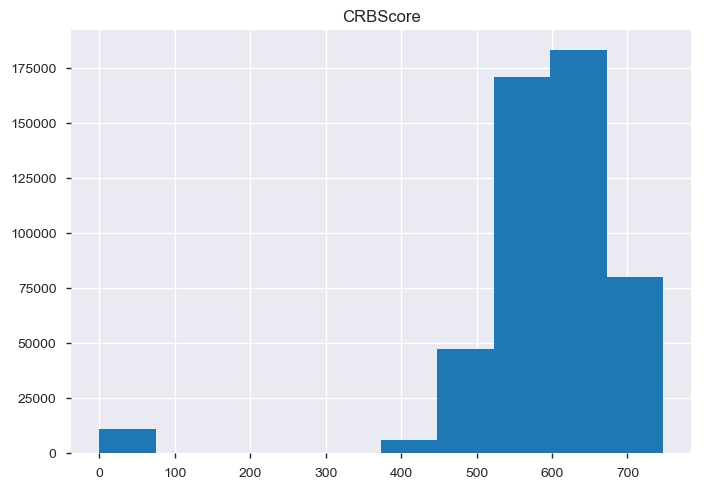

In [23]:
df.hist('CRBScore')

In [24]:
#Check for CRB0 and loans
df['CRBScore'].value_counts()
pd.crosstab(df.loans, df.CRBScore<100)

CRBScore,False,True
loans,,
1,126500,4724
2,145502,3092
3,110342,1966
4,62415,877
5,27656,369
6,11089,137
7,3593,47
8,1195,21
9,268,2


As the number of loans increases, the number of 0 CRB score individuals declines

In [25]:
pd.crosstab(df.loans, df.Default)

Default,0,1
loans,,
1,124151,7073
2,145569,3025
3,111094,1214
4,62902,390
5,27882,143
6,11176,50
7,3627,13
8,1209,7
9,270,0


Consquently, the **loan defaulters reduce as the number of loans taken increases**. 

We can therefore infer that a CRBScore of 0 exists for individuals with poor credit history, according to the rating bureau.

## 3. Customer Type

From the variable description, the customer type is an internal customer classification (1,2).  

In [26]:
df['CustomerType'].value_counts()

1.0    360347
2.0    139639
3.0         2
0.0         1
Name: CustomerType, dtype: int64

In [27]:
pd.crosstab(df.CustomerType, df.Default)

Default,0,1
CustomerType,,
0.0,1,0
1.0,353593,6754
2.0,134479,5160
3.0,1,1


In [28]:
pd.crosstab(df.CustomerType, df.CRBScore<100)

CRBScore,False,True
CustomerType,,
0.0,1,0
1.0,351957,8390
2.0,136794,2845
3.0,2,0


I shall consider this value to be ordinal in nature, because the number of defaulters reduces from 1 to 2 and the CRBScore reduces from customer type 1 to 2.

We can look at the outliers.

In [29]:
df[df['CustomerType']==3]

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default,loans
75810,63297,2017-08-12,31.0,3.0,6.0,66.0,0.0,0.0,4331.10,69646.66,52590.0,626.0,20900.0,1,3
290321,242509,2017-08-18,29.0,3.0,7.0,95.0,0.0,0.0,10817.87,132733.33,130000.0,660.0,70000.0,0,3


In [30]:
df[df['CustomerType']==0]

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default,loans
258136,215887,2017-11-29,30.0,0.0,2.0,133.0,0.0,86325.0,20471.73,0.0,68943.0,551.0,15000.0,0,1


The values can be replaced, using either of the following:
- Check if the customer has other loans, then replace accordingly
- Replace the values using a measure of central tendency

In [31]:
#Check if the customer has other loans
df[df['Customer_WID']==63297]

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default,loans
75810,63297,2017-08-12,31.0,3.0,6.0,66.0,0.0,0.0,4331.10,69646.66,52590.0,626.0,20900.0,1,3
75811,63297,2017-04-22,31.0,1.0,6.0,62.0,0.0,0.0,9162.92,70493.33,49330.0,660.0,20000.0,0,3
75812,63297,2017-06-06,31.0,1.0,6.0,64.0,0.0,0.0,5130.35,80683.33,91600.0,547.0,20150.0,0,3


For the outlier, we can replace the Customer Type with 1, because:

- The borrower defaulted
- The CRB Score ranges between those of the other two

In [32]:
df[df['Customer_WID']==242509]

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default,loans
290320,242509,2017-06-29,29.0,2.0,7.0,93.0,0.0,0.0,6769.12,292883.33,203100.0,660.0,70000.0,0,3
290321,242509,2017-08-18,29.0,3.0,7.0,95.0,0.0,0.0,10817.87,132733.33,130000.0,660.0,70000.0,0,3
290322,242509,2017-01-19,29.0,1.0,7.0,88.0,0.0,0.0,32665.25,479833.33,459000.0,660.0,100000.0,0,3


In this outlier, the customer's CRB score and default remains the same throughout. The replacement can be with either 1 or 2

In [33]:
df['CustomerType'].values[df['CustomerType']==3] = 1

In [34]:
df[df['Customer_WID']==215887]

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default,loans
258136,215887,2017-11-29,30.0,0.0,2.0,133.0,0.0,86325.0,20471.73,0.0,68943.0,551.0,15000.0,0,1


This shall be replaced with 1, due to the fact that the customer has 1 previous loan, and thus not much history with the lending institution

In [35]:
df['CustomerType'].values[df['CustomerType']==0] = 1

In [36]:
df['CustomerType'].value_counts()

1.0    360350
2.0    139639
Name: CustomerType, dtype: int64

## The Financial Measures

From the report, financial measure 1 mostly comprises of 0, financial measure 2 a mix of negative and positive values, and finanical measure 3 positive values. We can visualize the relationship between these measures

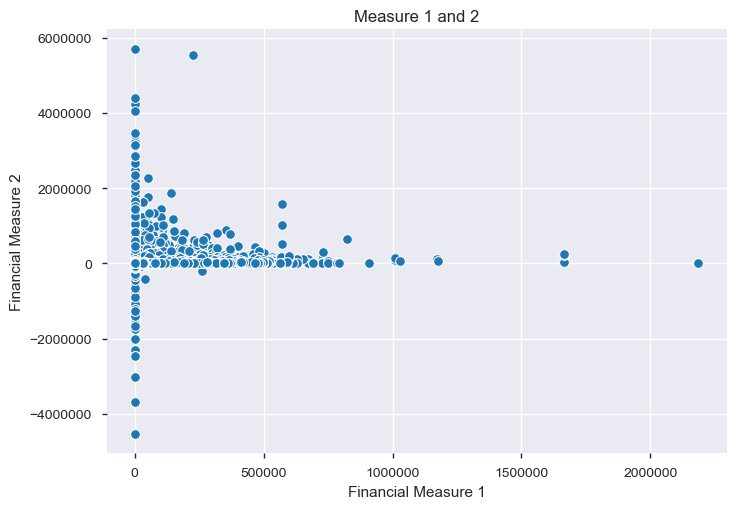

In [37]:
sns.scatterplot('FinancialMeasure1','FinancialMeasure2', data=df)
plt.xlabel('Financial Measure 1')
plt.ylabel('Financial Measure 2')
plt.title('Measure 1 and 2')
plt.show()

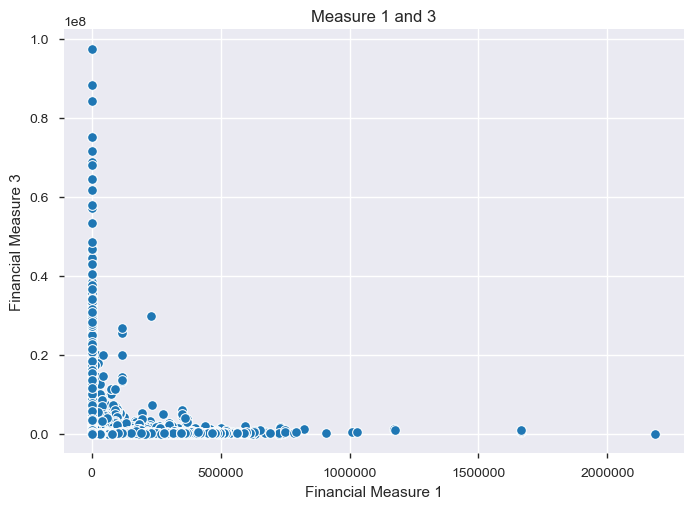

In [38]:
sns.scatterplot('FinancialMeasure1','FinancialMeasure3', data=df)
plt.xlabel('Financial Measure 1')
plt.ylabel('Financial Measure 3')
plt.title('Measure 1 and 3')
plt.show()

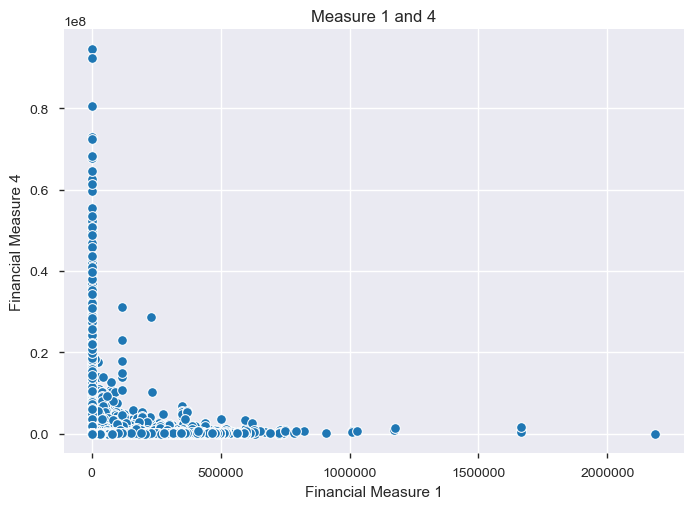

In [39]:
sns.scatterplot('FinancialMeasure1','FinancialMeasure4', data=df)
plt.xlabel('Financial Measure 1')
plt.ylabel('Financial Measure 4')
plt.title('Measure 1 and 4')
plt.show()

The high collinearity between 1 and 4 is seen in this scatterplot, as it takes a similar form to measure 3

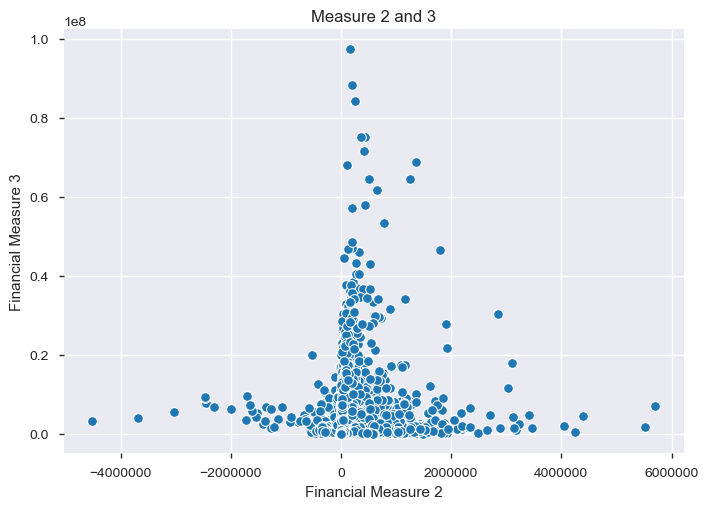

In [40]:
sns.scatterplot('FinancialMeasure2','FinancialMeasure3', data=df)
plt.xlabel('Financial Measure 2')
plt.ylabel('Financial Measure 3')
plt.title('Measure 2 and 3')
plt.show()

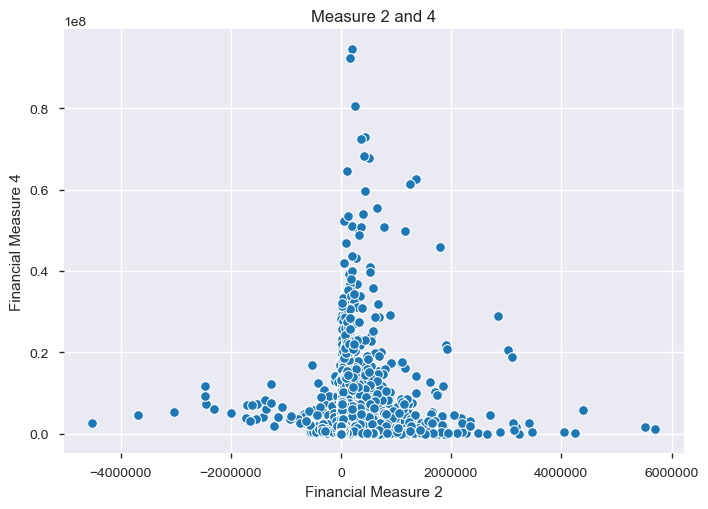

In [41]:
sns.scatterplot('FinancialMeasure2','FinancialMeasure4', data=df)
plt.xlabel('Financial Measure 2')
plt.ylabel('Financial Measure 4')
plt.title('Measure 2 and 4')
plt.show()

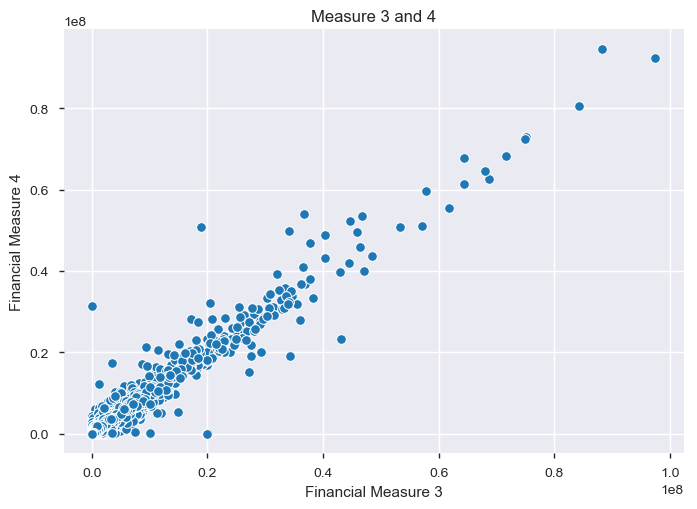

In [42]:
sns.scatterplot('FinancialMeasure3','FinancialMeasure4', data=df)
plt.xlabel('Financial Measure 3')
plt.ylabel('Financial Measure 4')
plt.title('Measure 3 and 4')
plt.show()

When 3 and 4 are plotted, a strong positive relationship is observed

In [43]:
#Create a new financial measure
df['fin1'] = df['FinancialMeasure1']+ df['FinancialMeasure2'] + df['FinancialMeasure3']

## Business variables

In [192]:
#Extract day, month, year
def extract_date(df,column):
    df[column+"_day"]=df[column].apply(lambda x: x.day)
    df[column+"_month"]=df[column].apply(lambda x: x.month)
    
extract_date(df, 'DisbursementDate')

In [193]:
#Create application fee variable
df['fee'] = df['Amount'].apply(lambda x:x*0.05)

In [194]:
df.head()

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default,DisbursementDate_day,DisbursementDate_month,fee
0,380415,2017-10-13,27.0,1.0,3.0,53.0,0.0,0.0,25.85,7308.66,8885.0,547.0,1000.0,0,13,10,50.0
1,153249,2017-09-06,54.0,1.0,3.0,142.0,0.0,0.0,12.05,6268.00,3807.0,506.0,2050.0,0,6,9,102.5
2,82776,2017-09-25,44.0,2.0,5.0,70.0,0.0,0.0,369.04,15475.66,13883.0,554.0,500.0,0,25,9,25.0
3,190996,2017-06-23,30.0,1.0,5.0,93.0,0.0,0.0,403.01,13294.33,13481.0,569.0,200.0,0,23,6,10.0
4,375566,2017-08-23,36.0,1.0,5.0,116.0,0.0,39678.0,2143.38,20054.76,19227.4,633.0,7000.0,0,23,8,350.0


In [47]:
#Create interest rate variable
rate=0.13/12
df['interest'] = df['Amount'].apply(lambda x: x*rate)

In [48]:
df.head()

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default,loans,fin1,DisbursementDate_day,DisbursementDate_month,fee,interest
0,2,2017-08-18,35.0,1.0,4.0,74.0,0.0,28172.0,1.08,19157.33,57472.00,551.0,4300.0,1,2,47330.41,18,8,215.0,46.583333
1,2,2017-02-15,35.0,1.0,5.0,68.0,0.0,28172.0,0.17,13465.00,15905.00,536.0,4000.0,0,2,41637.17,15,2,200.0,43.333333
2,4,2017-02-20,26.0,1.0,5.0,45.0,0.0,0.0,4256.69,15001.66,14992.00,579.0,2300.0,0,2,19258.35,20,2,115.0,24.916667
3,4,2017-01-19,26.0,1.0,5.0,44.0,0.0,0.0,4021.37,15405.66,14822.00,599.0,2000.0,0,2,19427.03,19,1,100.0,21.666667
4,5,2017-10-02,24.0,1.0,5.0,16.0,0.0,0.0,2035.22,14303.78,13842.15,547.0,6000.0,0,3,16339.00,2,10,300.0,65.000000


In [49]:
#Realised loan revenue, add fee and interest if default=0
def rev(row):
    if row['Default']==0:
        return row['fee'] + row['interest']
    elif row['Default']==1:
        return row['fee']-row['Amount']
    
df['revenue'] = df.apply(rev, axis=1).astype('int64')

In [50]:
df.head()

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,...,CRBScore,Amount,Default,loans,fin1,DisbursementDate_day,DisbursementDate_month,fee,interest,revenue
0,2,2017-08-18,35.0,1.0,4.0,74.0,0.0,28172.0,1.08,19157.33,...,551.0,4300.0,1,2,47330.41,18,8,215.0,46.583333,-4085
1,2,2017-02-15,35.0,1.0,5.0,68.0,0.0,28172.0,0.17,13465.00,...,536.0,4000.0,0,2,41637.17,15,2,200.0,43.333333,243
2,4,2017-02-20,26.0,1.0,5.0,45.0,0.0,0.0,4256.69,15001.66,...,579.0,2300.0,0,2,19258.35,20,2,115.0,24.916667,139
3,4,2017-01-19,26.0,1.0,5.0,44.0,0.0,0.0,4021.37,15405.66,...,599.0,2000.0,0,2,19427.03,19,1,100.0,21.666667,121
4,5,2017-10-02,24.0,1.0,5.0,16.0,0.0,0.0,2035.22,14303.78,...,547.0,6000.0,0,3,16339.00,2,10,300.0,65.000000,365


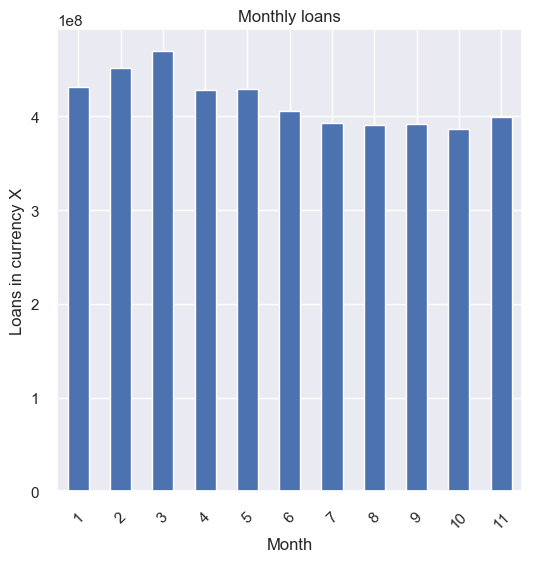

In [197]:
#Monthly revenue
rev = df.groupby(['DisbursementDate_month'])['Amount'].sum()
rev.plot(kind='bar')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.ylabel('Loans in currency X')
plt.title('Monthly loans')
plt.show()

## Variable interaction 

This section will look at how some independent variables interact with the dependent variable

- **Age and default**

In [52]:
df['Age'].describe()

count    499989.000000
mean         37.961237
std          10.701422
min          18.000000
25%          30.000000
50%          36.000000
75%          44.000000
max         100.000000
Name: Age, dtype: float64

In [53]:
#Bin ages
age_labels = ['17-22','22-27','27-32', '32-37','37-42' ,'42-47','47-52',
              '52-57','57-62','62-67', '67-72','72-77', '77-82', '82-87', '87-92', '92-97']
df['bin_age'] = pd.cut(df.Age, range(17,102,5), right=False, labels=age_labels)

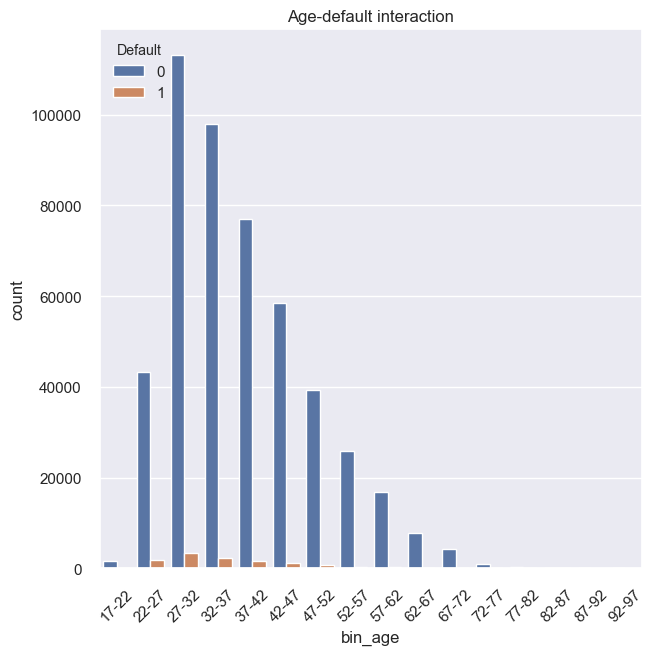

In [136]:
sns.set(rc={'figure.figsize':(7, 7)})
sns.countplot('bin_age', hue='Default', data=df)
plt.xticks(rotation=45)
plt.title('Age-default interaction')
plt.show()

The largest number of defaulters are in the 27-32 age group

Text(0.5,1,'SOR and Default')

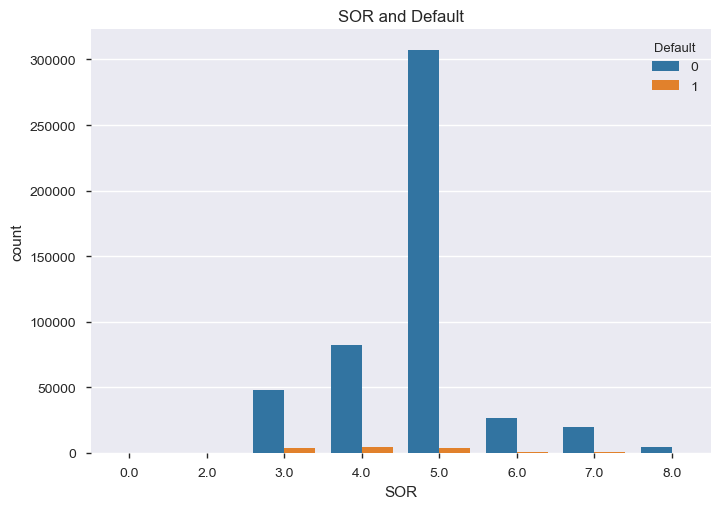

In [55]:
sns.countplot('SOR', hue='Default', data=df)
plt.title('SOR and Default')

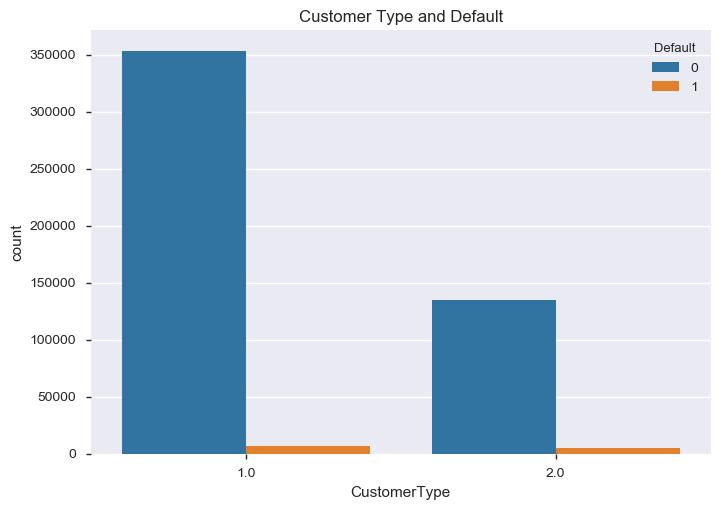

In [56]:
sns.countplot('CustomerType', hue='Default', data=df)
plt.title('Customer Type and Default')
plt.show()

From these examples, we can identify the most populous customer types. Of interest would be the interactions between the defaulters and these variables, to try identify their risk profile. However, this inference would be challenging to prove, due to the huge class imbalance present. Nevertheless, we can identify the 27-32 age group as the most prone to defaulting. Statistical testing would be necessary to confirm this.

H0 : Age group has no impact on your default

H1: Your age group affects your default

In [57]:
table3=pd.crosstab([df['Default']], df['bin_age'])
chi2, p, dof, expected = stats.chi2_contingency(table3.values)
print(p)

4.4291117702220965e-289


Using a **chi-square** test, the p-value is less than 0.05, so we reject the null. Age has an impact on default

In [58]:
table2=pd.crosstab([df['Default']], df['CustomerType'])
chi2, p, dof, expected = stats.chi2_contingency(table2.values)
print(p)

0.0


For default and customer type, the latter is statistically significant

## Variable selection

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499989 entries, 0 to 499988
Data columns (total 22 columns):
Customer_WID              499989 non-null int64
DisbursementDate          499989 non-null datetime64[ns]
Age                       499989 non-null float64
CustomerType              499989 non-null float64
SOR                       499989 non-null float64
MonthsSinceOpen           499989 non-null float64
MonthsSinceActive         499989 non-null float64
FinancialMeasure1         499989 non-null float64
FinancialMeasure2         499989 non-null float64
FinancialMeasure3         499989 non-null float64
FinancialMeasure4         499989 non-null float64
CRBScore                  499989 non-null float64
Amount                    499989 non-null float64
Default                   499989 non-null int64
loans                     499989 non-null int64
fin1                      499989 non-null float64
DisbursementDate_day      499989 non-null int64
DisbursementDate_month    499989 non-nul

In [60]:
#Remove repetitive columns
df.drop(columns=['Customer_WID','DisbursementDate','FinancialMeasure1', 'FinancialMeasure2', 
        'FinancialMeasure3', 'FinancialMeasure4'] , inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499989 entries, 0 to 499988
Data columns (total 16 columns):
Age                       499989 non-null float64
CustomerType              499989 non-null float64
SOR                       499989 non-null float64
MonthsSinceOpen           499989 non-null float64
MonthsSinceActive         499989 non-null float64
CRBScore                  499989 non-null float64
Amount                    499989 non-null float64
Default                   499989 non-null int64
loans                     499989 non-null int64
fin1                      499989 non-null float64
DisbursementDate_day      499989 non-null int64
DisbursementDate_month    499989 non-null int64
fee                       499989 non-null float64
interest                  499989 non-null float64
revenue                   499989 non-null int64
bin_age                   498721 non-null category
dtypes: category(1), float64(10), int64(5)
memory usage: 81.5 MB


## The Weight of Evidence

Logistic regression model is perhaps one of the most commonly used statistical techniques for solving binary classification problems. Credit scoring models heavily rely on some binary classification model, often being founded upon the logistic regression. A technique used to screen variables for this activity is the **weight of evidence** model.

The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable.Since it evolved from credit scoring field, is generally described as a measure of the separation of good(non-defaulting) and bad (defaulting) customers.

                            WOE = In(% of non-events ➗ % of events)
                            
**How to calculate the WOE**
1. For a continuous variable, split data into 10 parts (or lesser depending on the distribution).
2. Calculate the number of events and non-events in each group (bin)
3. Calculate the % of events and % of non-events in each group.
4. Calculate WOE by taking natural log of division of % of non-events and % of events

From the WOE, we are able to rank variables based on their predictive importance. This is done using the **information value**, which is calculated as follows:

                            IV = ∑ (% of non-events - % of events) * WOE
                            
**Decision rules for the information value**

According to Sidiqqi(2006), the decision rules for IV should be as follows:

|Information Value | Predicitive ability |
|- |- |  
| Less than 0.02 | Unpredictive 
|  0.02 to 0.1 | Weak predictor
|  0.1 to 0.3| Medium predictor
|  0.3 to 0.5 | Strong predictor
| Greater than 0.5 | Should be checked for overpredicting


The selected variables will then be transformed into their WoE values, which will then be used to develop an appropriate scorecard.

In [215]:
#Conduct a WOE transformation
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF = pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = d['Events'] / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = d['Non-Events'] / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], 
                            "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return d

In [216]:
iv = pd.DataFrame(iv_woe(data = df, target = 'Default', bins=10, show_woe = True))

Information value of Customer_WID is 0.001635
                 Cutoff      N  Events  % of Events  Non-Events  \
0      (1.999, 41856.9]  50000    1170     0.098196       48830   
1    (41856.9, 83571.8]  50000    1252     0.105078       48748   
2   (83571.8, 125348.0]  50002    1193     0.100126       48809   
3  (125348.0, 167266.0]  49999    1185     0.099454       48814   
4  (167266.0, 209088.5]  49999    1141     0.095762       48858   
5  (209088.5, 250355.0]  50003    1142     0.095846       48861   
6  (250355.0, 292242.0]  49998    1153     0.096769       48845   
7  (292242.0, 334252.0]  50000    1240     0.104070       48760   
8  (334252.0, 376378.2]  49999    1282     0.107595       48717   
9  (376378.2, 418241.0]  50000    1157     0.097104       48843   

   % of Non-Events       WoE            IV  
0         0.100044 -0.018650  3.447387e-05  
1         0.099876  0.050770  2.640823e-04  
2         0.100001  0.001248  1.558196e-07  
3         0.100011 -0.005583  3.1085

Information value of CustomerType is 0.110213
          Cutoff       N  Events  % of Events  Non-Events  % of Non-Events  \
0  (-0.001, 1.0]  360348    6754     0.566849      353594         0.724468   
1     (1.0, 2.0]  139639    5160     0.433068      134479         0.275530   
2     (2.0, 3.0]       2       1     0.000084           1         0.000002   

        WoE        IV  
0 -0.245346  0.038671  
1  0.452197  0.071238  
2  3.712669  0.000304  
Information value of SOR is 0.631453
          Cutoff       N  Events  % of Events  Non-Events  % of Non-Events  \
0  (-0.001, 3.0]   51495    3435     0.288292       48060         0.098469   
1     (3.0, 4.0]   86345    4261     0.357616       82084         0.168179   
2     (4.0, 5.0]  311027    3441     0.288796      307586         0.630204   
3     (5.0, 6.0]   26789     368     0.030885       26421         0.054133   
4     (6.0, 8.0]   24333     410     0.034410       23923         0.049015   

        WoE        IV  
0  1.074236  0.

Information value of DisbursementDate_day is 0.040682
         Cutoff      N  Events  % of Events  Non-Events  % of Non-Events  \
0  (0.999, 4.0]  70305    1762     0.147881       68543         0.140433   
1    (4.0, 6.0]  38439     876     0.073521       37563         0.076960   
2    (6.0, 9.0]  47110    1189     0.099790       45921         0.094084   
3   (9.0, 13.0]  54024    1496     0.125556       52528         0.107621   
4  (13.0, 16.0]  42951    1296     0.108770       41655         0.085344   
5  (16.0, 20.0]  59761    1714     0.143852       58047         0.118928   
6  (20.0, 23.0]  41079    1015     0.085187       40064         0.082084   
7  (23.0, 27.0]  69908    1331     0.111708       68577         0.140502   
8  (27.0, 29.0]  41187     663     0.055644       40524         0.083027   
9  (29.0, 31.0]  35236     573     0.048091       34663         0.071018   

        WoE        IV  
0  0.051680  0.000385  
1 -0.045717  0.000157  
2  0.058882  0.000336  
3  0.154140  

In [217]:
iv.sort_values(by = ['IV'], inplace=True)
iv

,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
9,"(800.0, 10000.0]",49569,1186,0.099538,48383,0.099128,0.004129,0.000002
8,"(572.5, 800.0]",50328,1233,0.103483,49095,0.100587,0.028384,0.000082
7,"(400.0, 572.5]",47394,1081,0.090726,46313,0.094887,-0.044845,0.000187
1,"(50.0, 75.0]",17987,395,0.033151,17592,0.036043,-0.083622,0.000242
2,"(75.0, 117.5]",43990,1199,0.100629,42791,0.087671,0.137852,0.001786
5,"(245.0, 300.0]",59614,1238,0.103903,58376,0.119602,-0.140716,0.002209
4,"(177.5, 245.0]",49447,989,0.083005,48458,0.099282,-0.179067,0.002915
6,"(300.0, 400.0]",43010,838,0.070332,42172,0.086403,-0.205802,0.003308
3,"(117.5, 177.5]",50584,971,0.081494,49613,0.101648,-0.220990,0.004454
0,"(4.999, 50.0]",88077,2785,0.233739,85292,0.174748,0.290859,0.017158


Text(0.5,1,'Visualisation of IV Scores')

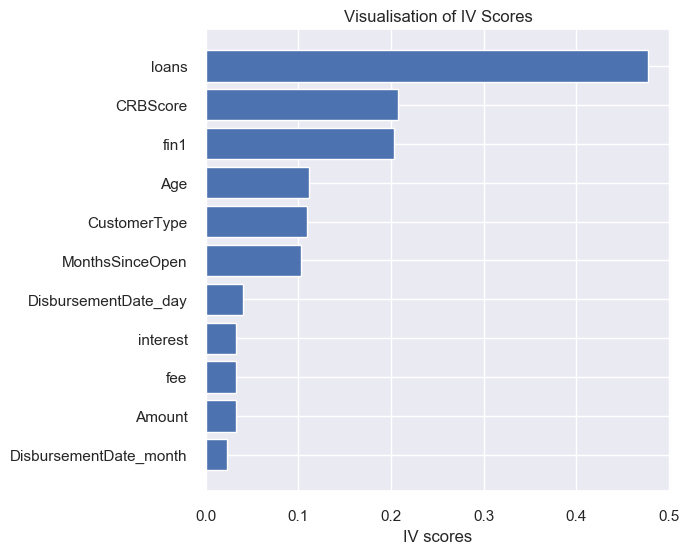

In [186]:
plt.barh(iv['Variable'], iv['IV'])
plt.xlabel('IV scores')
plt.title('Visualisation of IV Scores')

From this evaluation, all values except SOR, MonthsSinceActive and revenue are relevant. However, we know that fee and interest are derived from amount. Including them may introduce multicollinearity into the model. 

For the values with an IV greater than 0.5, Sadiqqi(2006) recommends excluding them from the modeling process, or
used in a 'controlled manner'. This controlled manner means including them for the preliminary analysis, then excluding them if necessary. The reason is to ensure a stable scorecard whose predictive powers will be strong in the face of changing characteristics. Scorecards with too few elements are generally unable to withstand the test of time, as they are susceptible to minor changes in the applicant's profile.

In [173]:
y = df[['Default']]

In [66]:
x = df[['DisbursementDate_month', 'Amount', 
        'DisbursementDate_day','MonthsSinceOpen','CustomerType','Age',
        'fin1','CRBScore','loans','SOR','MonthsSinceActive','revenue']]

## Data preparation

As we are dealing with a binary choice model, we need to check for class imbalances. Machine learning algorithms are designed to maximize accuracy and reduce error. They will fail at this if the classes are imbalanced.

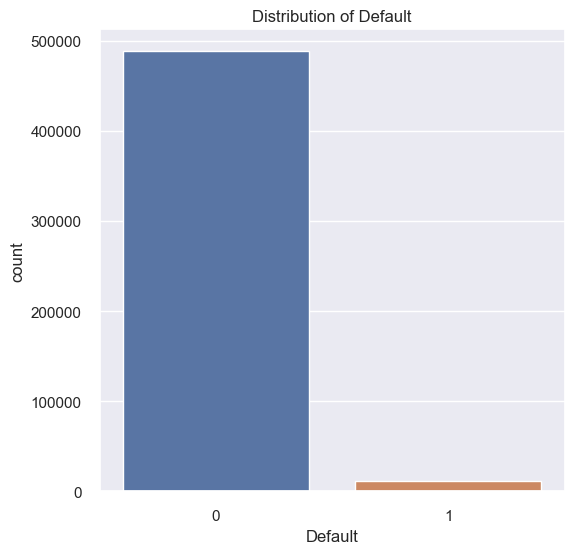

In [175]:
sns.set(rc={'figure.figsize':(6, 6)})
sns.countplot('Default', data=y)
plt.title('Distribution of Default')
plt.show()

There is a huge class imbalance observed in the dependent variable. This can be rectified using one of the following techniques:

- **Oversampling** : create artificial points of the minority class. This is a good choice when there is a small dataset. 

- **Undersampling** : removing some observations of the majority class. This is a good choice when the dataset is large. However, we remove information that may be valuable. This could lead to underfitting and poor generalization to the test set.

- **SMOTE** : Synthetic Minority Oversampling Technique synthesizes elements for the minority class based on those that already exist. It randomly picks a point from the class, and computes its k-nearest neighbours.

### 1. Split

In [165]:
# oversampling to handle the imbalanced classes of our target variable 

from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=27, ratio='minority')

x, y = smt.fit_sample(x, y)

ValueError: Expected 2D array, got 1D array instead:
array=[13733462 16620025 15775536 14170090 14710494 14849051 13673213 14432701
 14507806 15913161 17910986].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [69]:
#Train, test, split
xtr, xts, ytr, yts = train_test_split(x,y, test_size=0.3, random_state=42)
print('Training set: ', xtr.shape, ytr.shape)
print('Testing set: ', xts.shape, yts.shape)

Training set:  (683303, 12) (683303,)
Testing set:  (292845, 12) (292845,)


### 2. Standardize

The data selected has extremely large ranges. This needs to be standardized, for an accurate model.

In [70]:
scaler = StandardScaler()
xtr = scaler.fit_transform(xtr)
xts = scaler.transform(xts)

### 3. PCA

To avoid overfitting the model, we can reduce its dimensionality. This can be done using **principal component analysis**, which extracts low dimensional features from a high dimensional data set.

In [71]:
from sklearn.decomposition import PCA 

In [72]:
pca = PCA(random_state=0)

In [73]:
xtr = pca.fit_transform(xtr)
xts = pca.transform(xts)

In [74]:
pca.explained_variance_ratio_.cumsum()

array([0.20297778, 0.35893634, 0.4675048 , 0.559483  , 0.64797015,
       0.73019324, 0.8068035 , 0.87663311, 0.92988196, 0.97816696,
       1.        , 1.        ])

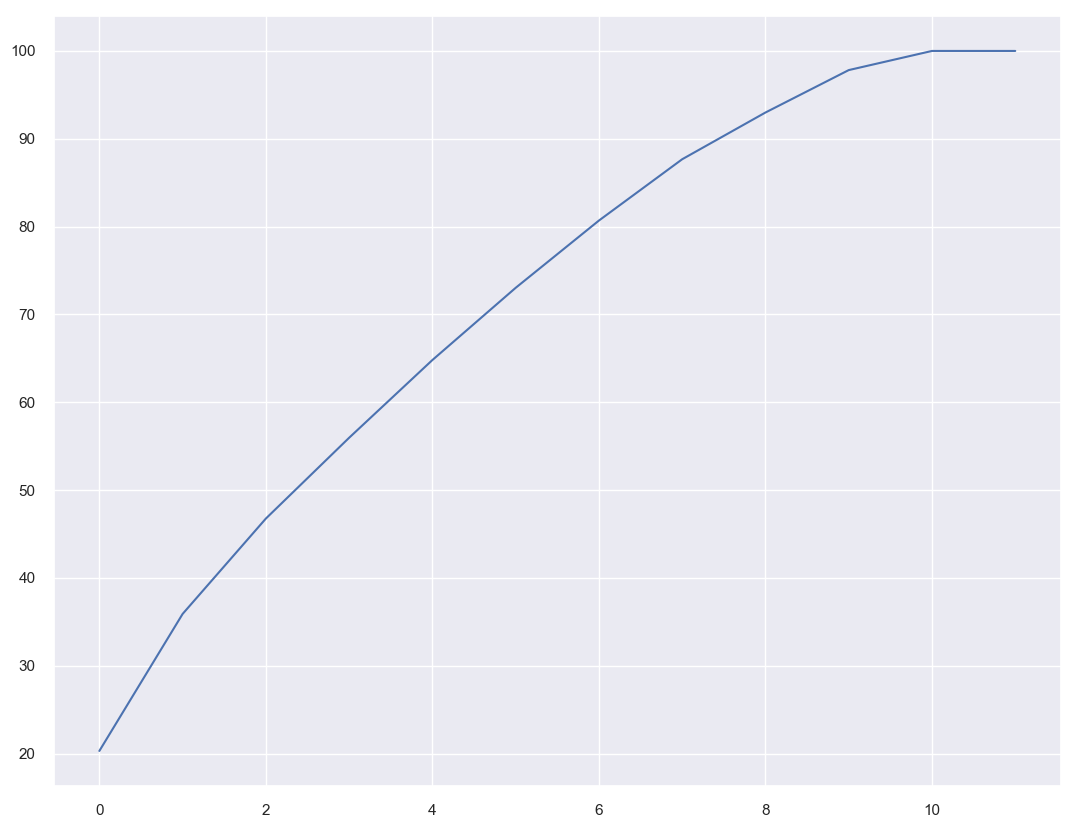

In [75]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

The elbow is at 10

In [76]:
pca = PCA(n_components=10, random_state=0)

In [77]:
xtr = pca.fit_transform(xtr)
xts = pca.transform(xts)

In [78]:
var2= pca.explained_variance_ratio_

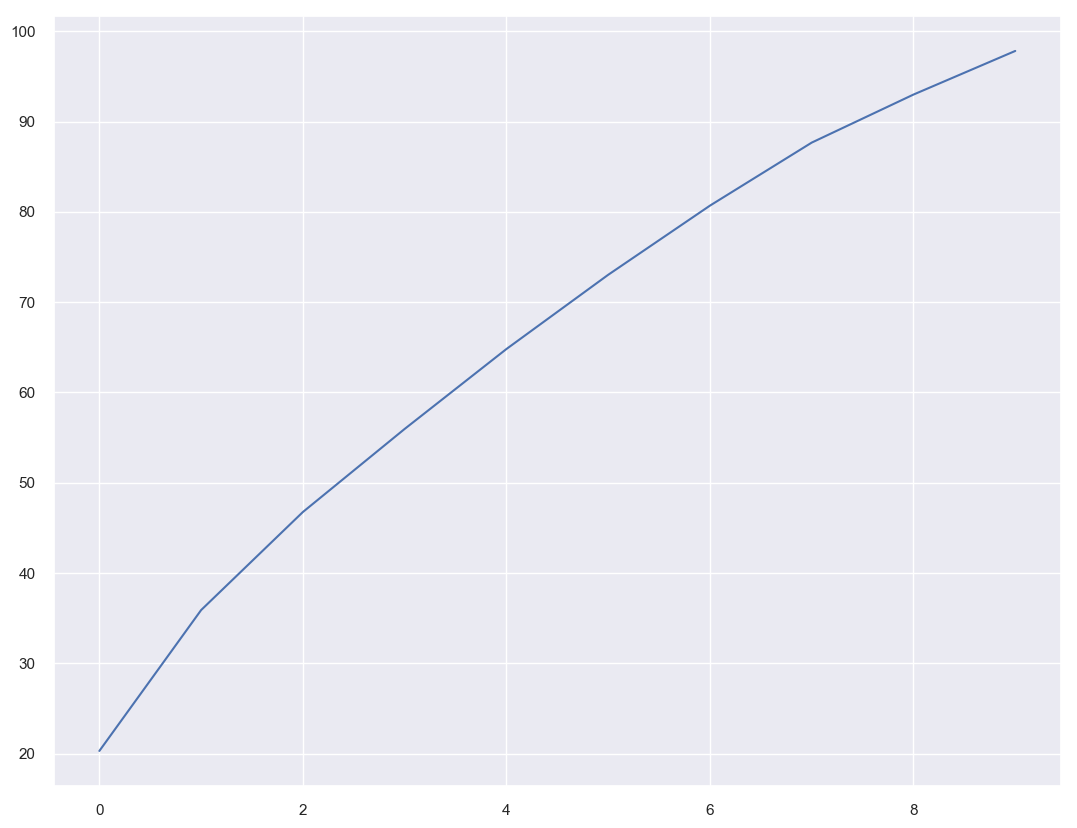

In [79]:
var3=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var3)

## Predicitive Models

NB: I shall provide a discussion of the results at the end

In [80]:
#Data Frame for evaluation metrics
answers=pd.DataFrame(index=['accuracy','precision','recall'],
                    columns=['LogisticReg','DecisionTree','RandomForest'])

## 1. Logistic model

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
logit = LogisticRegression(random_state=0)

In [83]:
logit.fit(xtr,ytr)

C:\Users\Jeanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [84]:
p1 = logit.predict(xts)

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

In [86]:
print(classification_report(p1, yts))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89    146365
           1       0.89      0.89      0.89    146480

   micro avg       0.89      0.89      0.89    292845
   macro avg       0.89      0.89      0.89    292845
weighted avg       0.89      0.89      0.89    292845



In [87]:
metrics.accuracy_score(yts, p1)

0.8875138725264218

In [88]:
#Plot ROC curve
probs = logit.predict_proba(xts)

In [89]:
pred = probs[:,1]

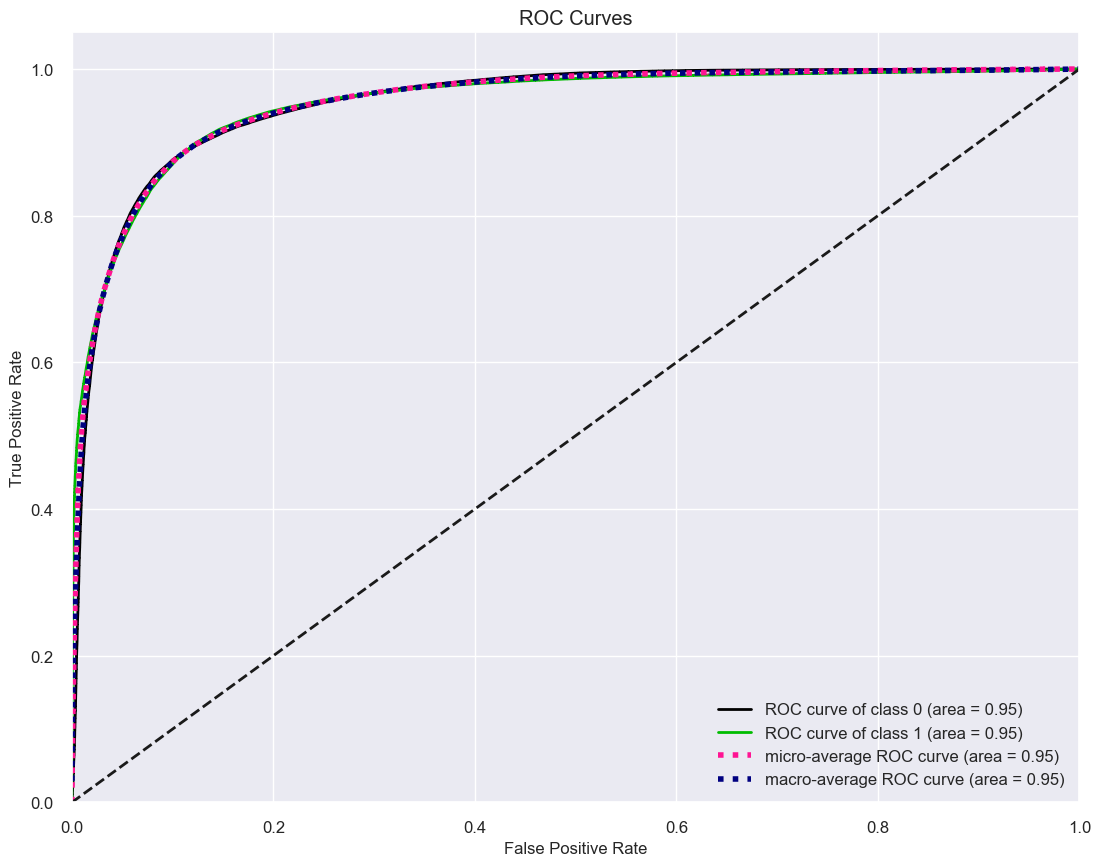

In [90]:
skplt.metrics.plot_roc(yts, probs)
plt.show()

The confusion matrix observations are too close to one another. I shall run again, without SOR, Months since active, revenue

In [91]:
y1 = df[['Default']]

In [92]:
x1 = df[['DisbursementDate_month', 'Amount', 
        'DisbursementDate_day','MonthsSinceOpen','CustomerType','Age',
        'fin1','CRBScore','loans']]

In [93]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=27, ratio='minority')

x1, y1 = smt.fit_sample(x1, y1)

C:\Users\Jeanie\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
#Train, test, split
xtr1, xts1, ytr1, yts1 = train_test_split(x1,y1, test_size=0.3, random_state=42)
print('Training set: ', xtr1.shape, ytr1.shape)
print('Testing set: ', xts1.shape, yts1.shape)

Training set:  (683303, 9) (683303,)
Testing set:  (292845, 9) (292845,)


In [95]:
scaler = StandardScaler()
xtr1 = scaler.fit_transform(xtr1)
xts1 = scaler.transform(xts1)

In [96]:
pca = PCA(random_state=0)
xtr1 = pca.fit_transform(xtr1)
xts1 = pca.transform(xts1)

In [97]:
pca.explained_variance_ratio_.cumsum()

array([0.1898    , 0.34961247, 0.47886311, 0.58900593, 0.69127925,
       0.78299305, 0.86779143, 0.94005308, 1.        ])

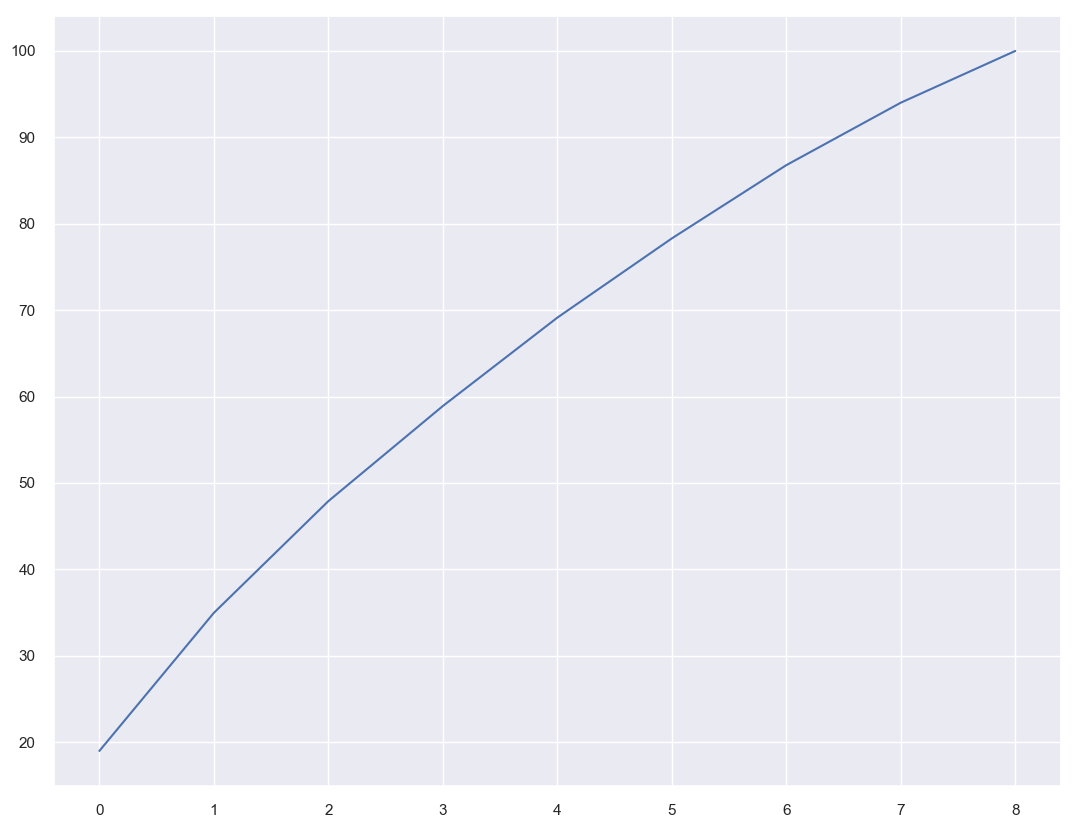

In [98]:
var1a=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1a)

In [99]:
logit.fit(xtr1,ytr1)

C:\Users\Jeanie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [100]:
p2 = logit.predict(xts1)

In [101]:
print(classification_report(yts1, p2))

              precision    recall  f1-score   support

           0       0.72      0.65      0.69    146288
           1       0.68      0.75      0.72    146557

   micro avg       0.70      0.70      0.70    292845
   macro avg       0.70      0.70      0.70    292845
weighted avg       0.70      0.70      0.70    292845



In [102]:
metrics.accuracy_score(yts1, p2)

0.702726698424081

In [103]:
answers.loc['accuracy', 'LogisticReg'] = metrics.accuracy_score(yts1, p2)
answers.loc['precision', 'LogisticReg']=metrics.precision_score(yts1,p2)
answers.loc['recall', 'LogisticReg']= metrics.recall_score(yts1, p2)

In [104]:
#Plot ROC curve
probs1 = logit.predict_proba(xts1)

In [105]:
pred = probs1[:,1]

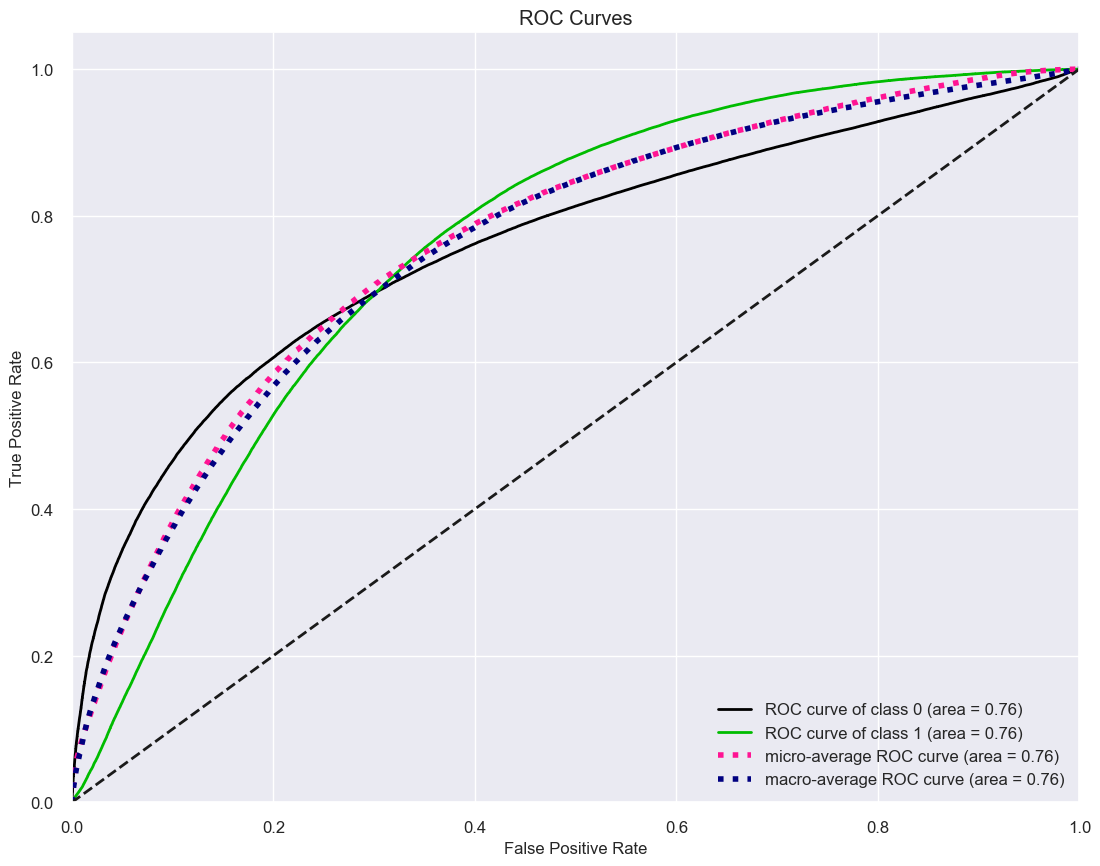

In [106]:
skplt.metrics.plot_roc(yts1, probs1)
plt.show()

## 2. Decision Tree Classifier

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
tree = DecisionTreeClassifier(random_state=0)

In [109]:
tree.fit(xtr1, ytr1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [110]:
p3= tree.predict(xts1)

In [111]:
print(classification_report(p3, yts1))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85    141630
           1       0.87      0.84      0.86    151215

   micro avg       0.85      0.85      0.85    292845
   macro avg       0.85      0.85      0.85    292845
weighted avg       0.85      0.85      0.85    292845



In [112]:
answers.loc['accuracy', 'DecisionTree'] = metrics.accuracy_score(yts1, p3)
answers.loc['precision', 'DecisionTree']=metrics.precision_score(yts1,p3)
answers.loc['recall', 'DecisionTree']= metrics.recall_score(yts1, p3)

In [113]:
#Plot ROC curve
probs = tree.predict_proba(xts1)

In [114]:
pred = probs[:,1]

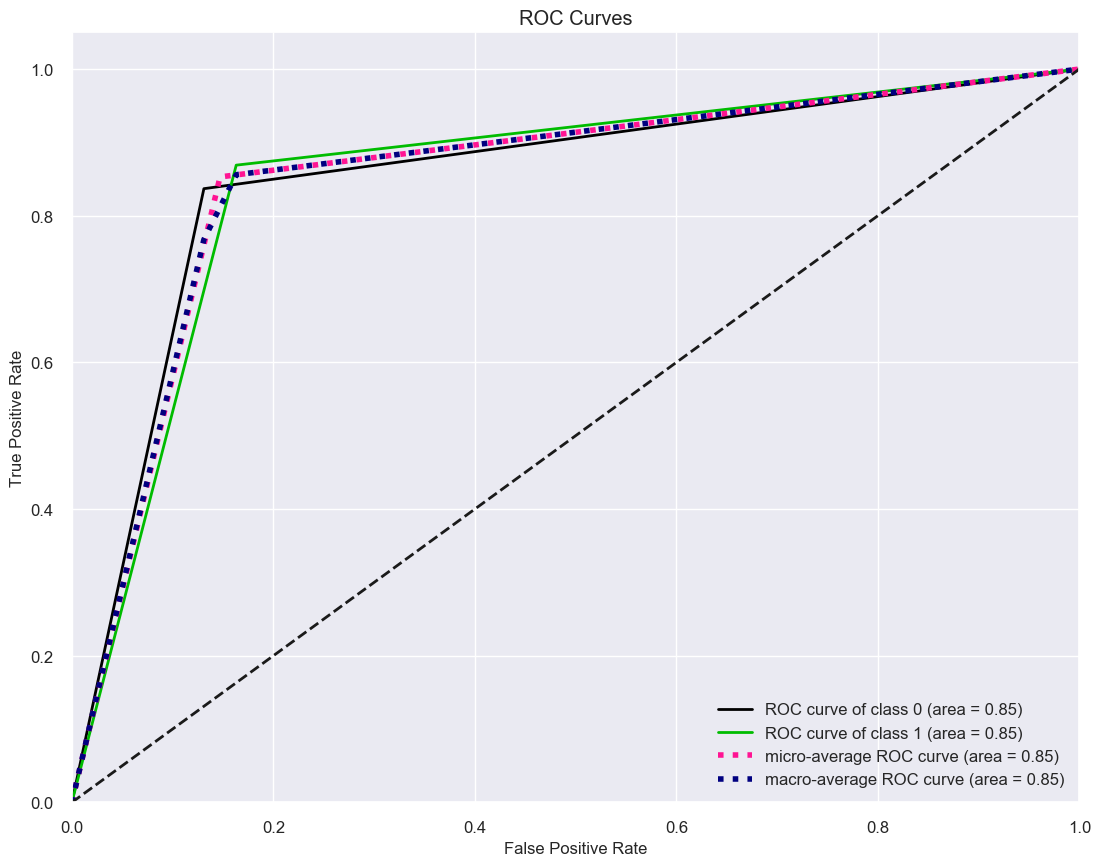

In [115]:
skplt.metrics.plot_roc(yts1, probs)
plt.show()

## 3. Random Forest

In [141]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, random_state=0, verbose=100)

In [176]:
clf.fit(xtr1, ytr1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 100
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s
building tree 2 of 100
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.2s remaining:    0.0s
building tree 3 of 100
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.0s remaining:    0.0s
building tree 4 of 100
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   30.4s remaining:    0.0s
building tree 5 of 100
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   37.8s remaining:    0.0s
building tree 6 of 100
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   45.5s remaining:    0.0s
building tree 7 of 100
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   53.1s remaining:    0.0s
building tree 8 of 100
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.0min remaining:    0.0s
building tree 9 of 100
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.1min remaining: 

[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed: 10.8min remaining:    0.0s
building tree 80 of 100
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 10.9min remaining:    0.0s
building tree 81 of 100
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 11.0min remaining:    0.0s
building tree 82 of 100
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed: 11.2min remaining:    0.0s
building tree 83 of 100
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed: 11.3min remaining:    0.0s
building tree 84 of 100
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed: 11.4min remaining:    0.0s
building tree 85 of 100
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed: 11.6min remaining:    0.0s
building tree 86 of 100
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed: 11.7min remaining:    0.0s
building tree 87 of 100
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed: 11.8min remaining:    0.0s
building tree 88 of 100
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed: 12.0min rem

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=100, warm_start=False)

In [177]:
p2 = clf.predict(xts1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

In [178]:
print(classification_report(p2, yts))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92    140216
           1       0.94      0.91      0.92    152629

   micro avg       0.92      0.92      0.92    292845
   macro avg       0.92      0.92      0.92    292845
weighted avg       0.92      0.92      0.92    292845



In [179]:
metrics.accuracy_score(yts, p2)

0.9217743174717

In [180]:
#Plot ROC curve
probs = clf.predict_proba(xts1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

In [181]:
pred = probs[:,1]

In [182]:
answers.loc['accuracy', 'RandomForest'] = metrics.accuracy_score(yts1, p2)
answers.loc['precision', 'RandomForest']=metrics.precision_score(yts1,p2)
answers.loc['recall', 'RandomForest']= metrics.recall_score(yts1, p2)

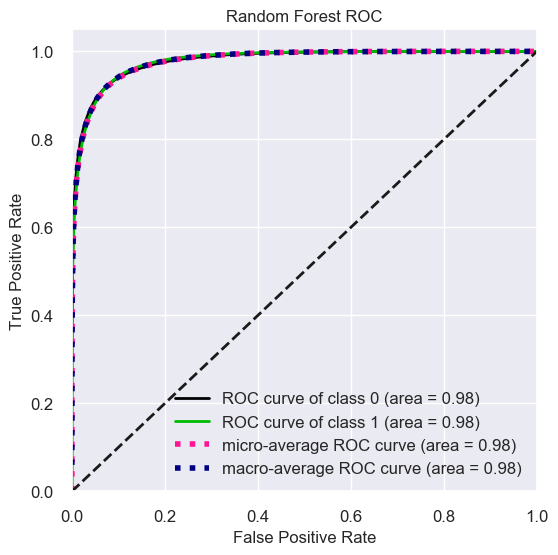

In [188]:
skplt.metrics.plot_roc(yts1, probs)
plt.title('Random Forest ROC')
plt.show()

## Model Discussion

In [184]:
answers

,LogisticReg,DecisionTree,RandomForest
accuracy,0.702727,0.852926,0.921774
precision,0.684791,0.842185,0.905064
recall,0.752267,0.868952,0.942562


# Improving the CRB Score

The WoE technique described above can be used to build an internally generated scoring model.
The full application shall not be demonstarted here, as it is computationally expensive.

To apply the WoE, the WoE values for each variable category(bin) shall be used to transform the current variables into weighted values.
After this a logistic regression shall be fitted onto the new dataset. The log-odds values will be converted into a points based system for the scorecard.

Another way would be to arbitrarily establish some scoring system, based on certain customer characteristics, otherwise known as risk profile.
For example, the score could be based on, among other factors, the customer's relationship with the bank. A score greater than 5 would contribute 10 points to the new score, between 3 and 5, 7 points. The challenge with this method, would be the level of subjectivity introduced into the model. Even if the metrics are backed by statistical measures, there shall still be some level of subjectivity. As identified earlier, the good financial intermediary shall be the one who can select the best set of non-defaulting borrowers, who will borrow loans that maximize the firm's income.

## Revenues and loan acceptance

Using the existing data, we can identify the monthly revenues, under the current scoring system

In [126]:
x = df.groupby('DisbursementDate_month')['revenue'].sum()

In [127]:
x.sort_values()

DisbursementDate_month
7     13673213
1     13733462
4     14170090
8     14432701
9     14507806
5     14710494
6     14849051
3     15775536
10    15913161
2     16620025
11    17910986
Name: revenue, dtype: int64

The highest revenues are in the 7th month

# Predict revenue with logit

In [143]:
p2 = logit.predict(xts1)

In [144]:
p2

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [208]:
df.index.name = 'TransactionID'
logit_p = pd.DataFrame({'Actual':yts, 'Predicted':p2})
logit_p
#amt=pd.DataFrame(df.loc[:,'Amount'])
#amt
#logit_p=pd.merge(logit_p,amt,on='TransactionID',how='inner')

,Actual,Predicted
0,0,1
1,0,0
2,1,1
3,0,0
4,1,1
5,1,1
6,1,1
7,1,1
8,0,0
9,1,1


In [209]:
logit_p.head()

,Actual,Predicted
0,0,1
1,0,0
2,1,1
3,0,0
4,1,1


In [ ]:
logit_p['ActualIncome'] = df['']

## Recommendations and conclusion

For a good credit scoring model, the firm needs to invest in a good credit score mechanism. The WoE measure will be useful with such a case, as it can be incorporated with other software, which can handle larger datasets. Even with the best mechanism, the data used needs to be useful in generating a coherent risk profile. The better model in this case would be decision tree, due to the high number of estimators as compared to random forest, which, although has higher values, should not be trusted.

Additional data that can be used includes the use of the loan. Different loans come from different risk classes, which can be avoided. 

In [205]:
df.head()

,Customer_WID,DisbursementDate,Age,CustomerType,SOR,MonthsSinceOpen,MonthsSinceActive,FinancialMeasure1,FinancialMeasure2,FinancialMeasure3,FinancialMeasure4,CRBScore,Amount,Default,DisbursementDate_day,DisbursementDate_month,fee
TransactionID,,,,,,,,,,,,,,,,,
0,380415,2017-10-13,27.0,1.0,3.0,53.0,0.0,0.0,25.85,7308.66,8885.0,547.0,1000.0,0,13,10,50.0
1,153249,2017-09-06,54.0,1.0,3.0,142.0,0.0,0.0,12.05,6268.00,3807.0,506.0,2050.0,0,6,9,102.5
2,82776,2017-09-25,44.0,2.0,5.0,70.0,0.0,0.0,369.04,15475.66,13883.0,554.0,500.0,0,25,9,25.0
3,190996,2017-06-23,30.0,1.0,5.0,93.0,0.0,0.0,403.01,13294.33,13481.0,569.0,200.0,0,23,6,10.0
4,375566,2017-08-23,36.0,1.0,5.0,116.0,0.0,39678.0,2143.38,20054.76,19227.4,633.0,7000.0,0,23,8,350.0
